# Lab 2 - Mathieu Rundstrom

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 2. Random matrix
The following generates an $n\times n$ matrix, with entries drawn uniformly from $[-1, 1]$.

In [13]:
def randomMatrix(n):
    A = np.random.uniform(-1,1,(n,n))
    return A

## 3. GEPP

In [14]:
def swapRow(A, i, pivot): #swaps row i with pivot
    A[[i, pivot]] = A[[pivot, i]]   
        
def findPivot(A, i): #finds pivot
    maxIndex = abs(A[i:,i]).argmax() + i
    return maxIndex

def addRow(A, i, j, x): #adds an x multiple of row i to row j
    A[j] = A[j]+x*A[i]

def rowReduction(A, i):
    pivot = findPivot(A, i)
    while pivot==0:
        i=i+1
        pivot = findPivot(A, i)
    if pivot!=i:
        swapRow(A, i, pivot)
    for k in range(i+1, len(A)):
        x=(-1/A[i,i])*A[k, i]
        addRow(A, i, k, x)

def gepp(A): #GEPP
    R = np.copy(A)
    for i in range(len(R)-1):
        rowReduction(R, 0)
    #cleanMatrix(R)
    return R

## Test Cases
The below cases are correct, and were verified manually.

In [15]:
B=np.array([[1,-1,3,2],[0,1,0,17],[10,0,1,4],[2,-2,0.2,-5]], dtype=float)
print(gepp(B))
C=np.array([[0.0,1.0],[1.0,0.0]], dtype=float)
print(gepp(C))
D=np.array([[1,5,2],[2.5,3,7],[2,2,3]], dtype=float)
print(gepp(D))

[[ 10.    0.    1.    4. ]
 [  0.   -2.    0.   -5.8]
 [  0.    0.    2.9   4.5]
 [  0.    0.    0.   14.1]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 2.5         3.          7.        ]
 [ 0.          3.8        -0.8       ]
 [ 0.          0.         -2.68421053]]


## Growth Factor


In [58]:
def growthFactor(A):
    maxA = abs(A).max()
    U = gepp(A)
    maxU = abs(U).max()
    return maxU / maxA

def avgGrowthFactor(n, k, matrix):
    c = 0
    for i in range(k):
        A = matrix(n)
        c += growthFactor(A)
    return c / k

In [29]:
sizes = range(10,1000,35)
avgGrowth1 = []
for n in sizes:
    avgGrowth1.append(avgGrowthFactor(n, 10, randomMatrix))

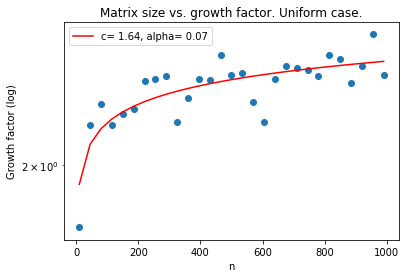

In [49]:
# Fits the data to a curve of the prescribed form
xValues = sizes
yValues = avgGrowth1
def func(n, c, a):
    return c * (n ** a)

# Scatter plot of samples, and  curve fitting
coef, temp = curve_fit(func, xValues, yValues)

plt.scatter(xValues, yValues)
plt.plot(xValues, func(xValues, *coef), 'r-', label='c=%5.2f, alpha=%5.2f' % tuple(coef))

plt.title('Matrix size vs. growth factor. Uniform case.')
plt.xlabel('n')
plt.ylabel('Growth factor (log)')
plt.yscale('log')
plt.legend()
plt.show()

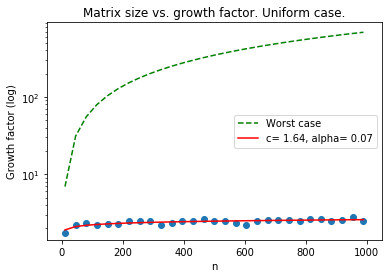

In [50]:
plt.plot(xValues, [n * np.log(2) for n in xValues], 'g--',
                     label='Worst case')
plt.scatter(xValues, yValues)
plt.plot(xValues, func(xValues, *coef), 'r-',label='c=%5.2f, alpha=%5.2f' % tuple(coef))
plt.title('Matrix size vs. growth factor. Uniform case.')
plt.xlabel('n')
plt.ylabel('Growth factor (log)')
plt.yscale('log')
plt.legend()
plt.show()

The first plot shows better than the second how the curve fits the data. As we we see in the second plot, the worst case is much worse than the experimental values obtained, as was expected from reading the paper and discussions in class. 

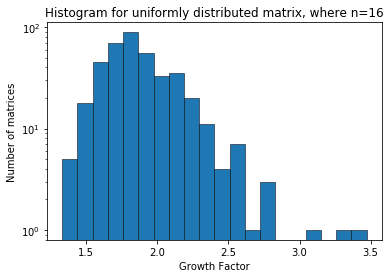

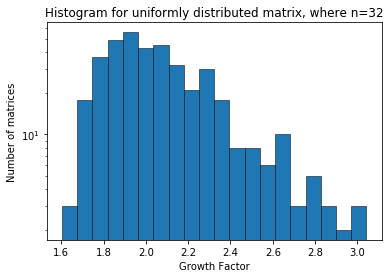

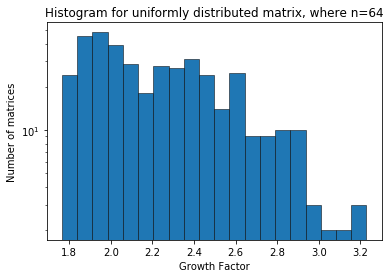

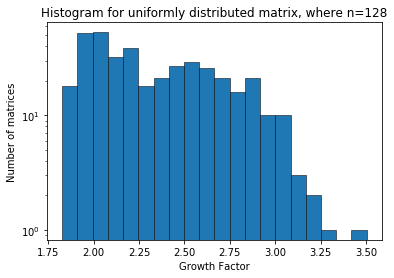

In [35]:
nValues = [16, 32, 64, 128]

for n in nValues :
    avgGrowth = []
    sumGrowthFactor = 0
    avgGrowthFactor = 0
    for i in range(400):
        M=randomMatrix(n)
        avgGrowth.append(growthFactor(M))
    plt.hist(avgGrowth, bins=20, log=True, linewidth=0.5, edgecolor='black')
    plt.title('Histogram for uniformly distributed matrix, where n={}'.format(n))
    plt.xlabel('Growth Factor')
    plt.ylabel('Number of matrices')
    plt.show()


All distributions are positevely skewed. However, for bigger $n$ values, the spread is more even over a bigger range on the lower end of the spectrum. We hypothesize that the larger the $n$, the more evenly spread it becomes. A consequence of this is a greater mean and also variance of the sample data.

## 6. Repeating the above two steps
We choose the standard normal, i.e. the normal distribution with $\mu=0$, $\sigma^2 = 1$. 

In [56]:
def normalMatrix(n):#This generates the normal matrix
    A = np.random.normal(0,1,(n,n))
    return A

In [ ]:
avgGrowth2 = []
sizes = range(10,1000,35)

for n in sizes:
    avgGrowth2.append(avgGrowthFactor(n, 10, normalMatrix))

In [51]:
# Estimate the values for C and alpha
xValues = sizes
yValues = avgGrowth2
def func(n, c, a):
    return c * (n ** a)

coef, temp = curve_fit(func, xValues, yValues)
print('Estimated C = {}, alpha = {}'.format(coef[0],coef[1]))

# Plot the results, the estimated curve 
plt.scatter(xValues, yValues)
plt.plot(xValues, func(xValues, *coef), 'r-', label='c=%5.2f, alpha=%5.2f' % tuple(coef))

plt.title('Matrix size vs. growth factor. Normal case.')
plt.xlabel('n')
plt.ylabel('Growth factor (log)')
plt.yscale('log')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (29,) (400,) 

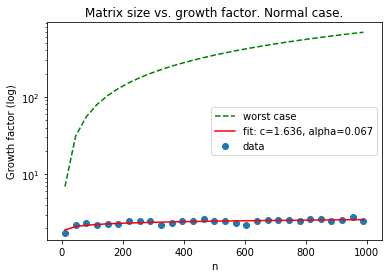

In [48]:
plt.plot(xValues, [n * np.log(2) for n in xValues], 'g--',
                     label='Worst case')
plt.scatter(xValues, yValues, label='data')
plt.plot(xValues, func(xValues, *coef), 'r-',
                    label='fit: c=%5.3f, alpha=%5.3f' % tuple(coef))

plt.title('Matrix size vs. growth factor. Normal case.')
plt.xlabel('n')
plt.ylabel('Growth factor (log)')
plt.yscale('log')
plt.legend()
plt.show()

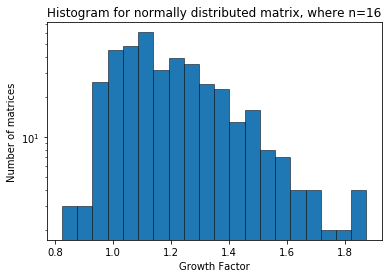

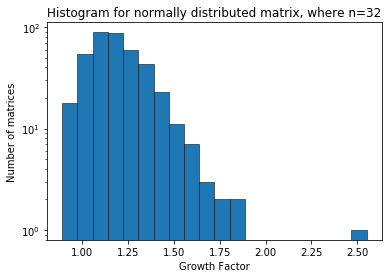

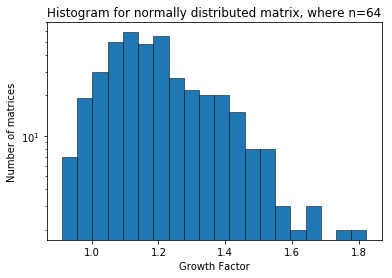

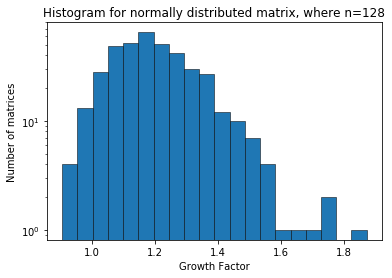

In [36]:
for n in nValues :
    avgGrowth = []
    sumGrowthFactor = 0
    avgGrowthFactor = 0
    for i in range(400):
        M=normalMatrix(n)
        avgGrowth.append(growthFactor(M))
    plt.hist(avgGrowth, bins=20, log=True, linewidth=0.5, edgecolor='black')
    plt.title('Histogram for normally distributed matrix, where n={}'.format(n))
    plt.xlabel('Growth Factor')
    plt.ylabel('Number of matrices')
    plt.show()

We again oberve the positive skewness in all distributions. In contrast to the uniform case, the shape of the distribution stays more the constant. We conjecture that the distrubtion will stay constant, at least for longer than in the uniform case. 